In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
(x_train,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data()
x_train.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

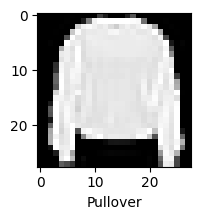

In [ ]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
def plot_sample(x, y, index):
    plt.figure(figsize=(4, 2))
    plt.imshow(x[index].squeeze(), cmap='gray')
    plt.xlabel(classes[y[index]])
    plt.show()
    plt.close()
plot_sample(x_train,y_train,7)


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.metrics import classification_report
import numpy as np

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

     layers.Conv2D(128, (3,3), activation='relu'),  # Extra Conv Layer
    layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])



In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [ ]:
cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.0996 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.1003 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.0984 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027


In [ ]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0998 - loss: 2.3026
Test Accuracy: 0.10000000149011612


In [ ]:
cnn.evaluate(x_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0978 - loss: 2.3028


[2.3026509284973145, 0.10000000149011612]

In [ ]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[0.09961744, 0.10094262, 0.0991525 , 0.0998821 , 0.09992298,
        0.10162582, 0.10173023, 0.09861831, 0.09808961, 0.10041832],
       [0.09961744, 0.10094262, 0.0991525 , 0.0998821 , 0.09992298,
        0.10162582, 0.10173023, 0.09861831, 0.09808961, 0.10041832],
       [0.09961744, 0.10094262, 0.0991525 , 0.0998821 , 0.09992298,
        0.10162582, 0.10173023, 0.09861831, 0.09808961, 0.10041832],
       [0.09961744, 0.10094262, 0.0991525 , 0.0998821 , 0.09992298,
        0.10162582, 0.10173023, 0.09861831, 0.09808961, 0.10041832],
       [0.09961744, 0.10094262, 0.0991525 , 0.0998821 , 0.09992298,
        0.10162582, 0.10173023, 0.09861831, 0.09808961, 0.10041832]],
      dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(6), np.int64(6), np.int64(6), np.int64(6), np.int64(6)]

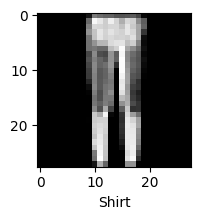

In [ ]:
plot_sample(x_test,y_classes,3)

In [ ]:
classes[y_classes[3]]

'Shirt'

In [ ]:
cnn.save("model.h5")

print("Model saved as model.h5")

Model saved as model.h5
